## Limpieza de Datos

In [94]:
from netCDF4 import Dataset, num2date
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as crs
import pprint
import pandas as pd 
import os
from datetime import datetime
import seaborn as sns
import dataframe_image as dfi
from geopy.distance import geodesic
from scipy.spatial.distance import cdist, pdist
from scipy import stats

#### Lectura de los datos tidy

In [95]:
ds = pd.read_csv("datos_tidy.csv") 
ds

,date,city_hmo,city_nog,city_obr,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
0,2021-03-01,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.000000,0.000,0.0,0.0,0.0
1,2021-03-02,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.000000,0.000,0.0,0.0,0.0
2,2021-03-03,Hermosillo,Heroica Nogales,Ciudad Obregón,0.015000,0.000000,0.000,0.0,0.0,0.0
3,2021-03-04,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.000000,0.000,0.0,0.0,0.0
4,2021-03-05,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.000000,0.000,0.0,0.0,0.0
5,2021-03-06,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.000000,0.000,0.0,0.0,0.0
6,2021-03-07,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.000000,0.000,0.0,0.0,0.0
7,2021-03-08,NaN,NaN,NaN,0.000000,0.000000,0.080,NaN,NaN,NaN
8,2021-03-09,NaN,NaN,NaN,0.070000,0.000000,0.490,NaN,NaN,NaN
9,2021-03-10,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000000,0.415000,0.405,0.0,0.0,0.0


In [96]:
#date tiene formato correcto
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        153 non-null    object 
 1   city_hmo    132 non-null    object 
 2   city_nog    132 non-null    object 
 3   city_obr    132 non-null    object 
 4   HQprcp_hmo  153 non-null    float64
 5   HQprcp_nog  153 non-null    float64
 6   HQprcp_obr  153 non-null    float64
 7   prcp_hmo    132 non-null    float64
 8   prcp_nog    132 non-null    float64
 9   prcp_obr    132 non-null    float64
dtypes: float64(6), object(4)
memory usage: 12.1+ KB


In [97]:
#Convertir date to datetime
ds["date"] = pd.to_datetime(ds.date)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        153 non-null    datetime64[ns]
 1   city_hmo    132 non-null    object        
 2   city_nog    132 non-null    object        
 3   city_obr    132 non-null    object        
 4   HQprcp_hmo  153 non-null    float64       
 5   HQprcp_nog  153 non-null    float64       
 6   HQprcp_obr  153 non-null    float64       
 7   prcp_hmo    132 non-null    float64       
 8   prcp_nog    132 non-null    float64       
 9   prcp_obr    132 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 12.1+ KB


#### Búsqueda de valores faltantes

In [98]:
#Se puede observar que hay 21 renglones faltantes en algunas características
ds.isnull().sum()

date           0
city_hmo      21
city_nog      21
city_obr      21
HQprcp_hmo     0
HQprcp_nog     0
HQprcp_obr     0
prcp_hmo      21
prcp_nog      21
prcp_obr      21
dtype: int64

#### Imputación de datos faltantes, primero observaremos los renglones en los cuales existen datos faltantes. Revisando en los archivos pudimos corroborar que no existen los datos para esas fechas en especifico de los datasets de PROMETEUS

In [99]:
is_nan = ds.isnull()
nan_rows = is_nan.any(axis=1)

ds[nan_rows]

,date,city_hmo,city_nog,city_obr,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
7,2021-03-08,NaN,NaN,NaN,0.00,0.00,0.080,NaN,NaN,NaN
8,2021-03-09,NaN,NaN,NaN,0.07,0.00,0.490,NaN,NaN,NaN
10,2021-03-11,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
11,2021-03-12,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
12,2021-03-13,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
13,2021-03-14,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
14,2021-03-15,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
15,2021-03-16,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
16,2021-03-17,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN
17,2021-03-18,NaN,NaN,NaN,0.00,0.00,0.000,NaN,NaN,NaN


#### Para los datos de precipitación utilizaremos un metodo de interpolación, para los de las ciudades solamente asignaremos el nombre de la ciudad faltante

In [100]:
ds.prcp_hmo.interpolate(limit_direction="both", inplace=True)
ds.prcp_nog.interpolate(limit_direction="both", inplace=True)
ds.prcp_obr.interpolate(limit_direction="both", inplace=True)

#### Ya podemos observar que se modificaron los valores de precipitación

In [101]:
ds[nan_rows]

,date,city_hmo,city_nog,city_obr,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
7,2021-03-08,NaN,NaN,NaN,0.00,0.00,0.080,0.0,0.0,0.0
8,2021-03-09,NaN,NaN,NaN,0.07,0.00,0.490,0.0,0.0,0.0
10,2021-03-11,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
11,2021-03-12,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
12,2021-03-13,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
13,2021-03-14,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
14,2021-03-15,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
15,2021-03-16,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
16,2021-03-17,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0
17,2021-03-18,NaN,NaN,NaN,0.00,0.00,0.000,0.0,0.0,0.0


In [102]:
ds["city_hmo"] = ds["city_hmo"].fillna(value="Hermosillo")
ds["city_nog"] = ds["city_nog"].fillna(value="Heroica Nogales")
ds["city_obr"] = ds["city_obr"].fillna(value="Ciudad Obregón")

#### En este punto han desaparecido los valores NaN

In [103]:
ds[nan_rows]

,date,city_hmo,city_nog,city_obr,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
7,2021-03-08,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.080,0.0,0.0,0.0
8,2021-03-09,Hermosillo,Heroica Nogales,Ciudad Obregón,0.07,0.00,0.490,0.0,0.0,0.0
10,2021-03-11,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
11,2021-03-12,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
12,2021-03-13,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
13,2021-03-14,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
14,2021-03-15,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
15,2021-03-16,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
16,2021-03-17,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0
17,2021-03-18,Hermosillo,Heroica Nogales,Ciudad Obregón,0.00,0.00,0.000,0.0,0.0,0.0


### Detección de Anomalías utilizando Z-score

In [104]:
sel_ds = ds.select_dtypes(include=np.number)
sel_ds

,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
0,0.000000,0.000000,0.000,0.0,0.0,0.0
1,0.000000,0.000000,0.000,0.0,0.0,0.0
2,0.015000,0.000000,0.000,0.0,0.0,0.0
3,0.000000,0.000000,0.000,0.0,0.0,0.0
4,0.000000,0.000000,0.000,0.0,0.0,0.0
5,0.000000,0.000000,0.000,0.0,0.0,0.0
6,0.000000,0.000000,0.000,0.0,0.0,0.0
7,0.000000,0.000000,0.080,0.0,0.0,0.0
8,0.070000,0.000000,0.490,0.0,0.0,0.0
9,0.000000,0.415000,0.405,0.0,0.0,0.0


In [105]:
z = np.abs(stats.zscore(sel_ds))
threshold = 3
print(np.where(z > 3))

(array([ 93, 114, 120, 122, 123, 124, 124, 124, 125, 125, 126, 128, 129,
       132, 133, 133, 138, 140, 144, 146, 151, 151]), array([1, 3, 5, 2, 4, 2, 3, 5, 0, 5, 5, 5, 0, 5, 0, 2, 0, 2, 4, 4, 0, 2]))


##### Al parecer detecta outliers pero pueden ser valores esperados ya que se trata de precipitación acumulada en 24 horas.

In [110]:
print(z[114][3])

4.102564192811632


In [111]:
print(sel_ds.iloc[93][1])

19.584999084472656


In [112]:
pd.set_option('display.max_rows', None)
sel_ds

,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
0,0.000000,0.000000,0.000,0.0,0.0,0.0
1,0.000000,0.000000,0.000,0.0,0.0,0.0
2,0.015000,0.000000,0.000,0.0,0.0,0.0
3,0.000000,0.000000,0.000,0.0,0.0,0.0
4,0.000000,0.000000,0.000,0.0,0.0,0.0
5,0.000000,0.000000,0.000,0.0,0.0,0.0
6,0.000000,0.000000,0.000,0.0,0.0,0.0
7,0.000000,0.000000,0.080,0.0,0.0,0.0
8,0.070000,0.000000,0.490,0.0,0.0,0.0
9,0.000000,0.415000,0.405,0.0,0.0,0.0


#### Podemos visualizar mejor con graficas de caja

In [150]:
# Agrupar cada 15 dias y generar un boxplot para HQprcp y precipitation
dg = ds.groupby(pd.Grouper(key="date", freq="15d")).sum()

Text(0, 0.5, 'mm')

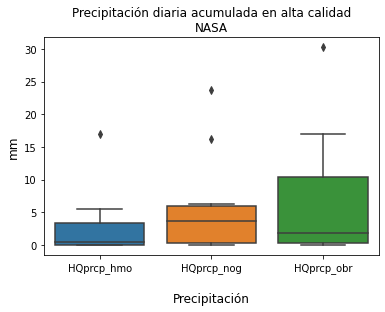

In [151]:
sns.boxplot(data = dg[["HQprcp_hmo","HQprcp_nog","HQprcp_obr"]])
plt.title("Precipitación diaria acumulada en alta calidad\nNASA", fontsize=12)
plt.xlabel("\nPrecipitación", fontsize=12)
plt.ylabel("mm", fontsize=12)


Text(0, 0.5, 'mm')

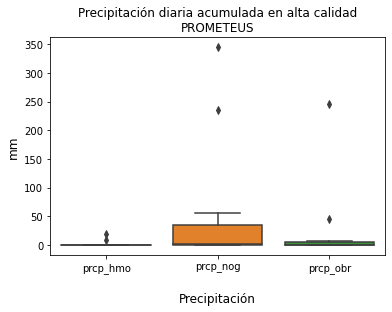

In [152]:
sns.boxplot(data = dg[["prcp_hmo","prcp_nog","prcp_obr"]])
plt.title("Precipitación diaria acumulada en alta calidad\nPROMETEUS", fontsize=12)
plt.xlabel("\nPrecipitación", fontsize=12)
plt.ylabel("mm", fontsize=12)

#### Revisando las estadísticas podemos ver que no necesariamente se tratan de outlier, ya que la maxima que se presento fue de 41 mm en el pronóstico de PROMETEUS. 

In [154]:
ds.describe()

,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.00000
mean,0.197386,0.409248,0.488824,0.182353,4.281046,1.97451
std,0.748419,1.777923,1.656170,1.667259,11.955431,7.18014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.035000,0.050000,0.000000,0.300000,0.00000
max,5.639999,19.584999,11.865000,19.400000,83.800000,41.10000


#### Como conclusión podemos determinar dejar tal cual estan los datos, al no considerarlos como atípicos

#### Guardamos el dataframe  a un archivo para despues aplicarle el EDA

In [155]:
ds.to_csv("datos_limpios.csv", index=False)